In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

In [3]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

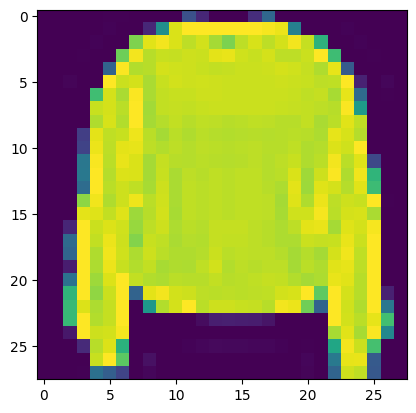

In [5]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [6]:
# Check our samples label
train_labels[7]

2

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

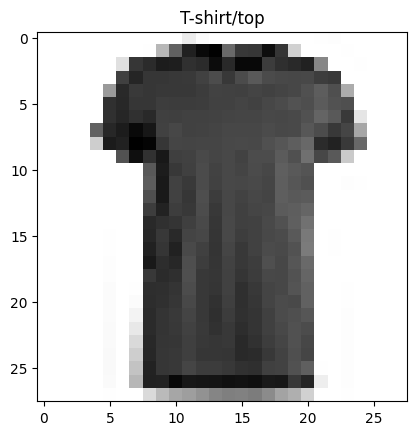

In [8]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

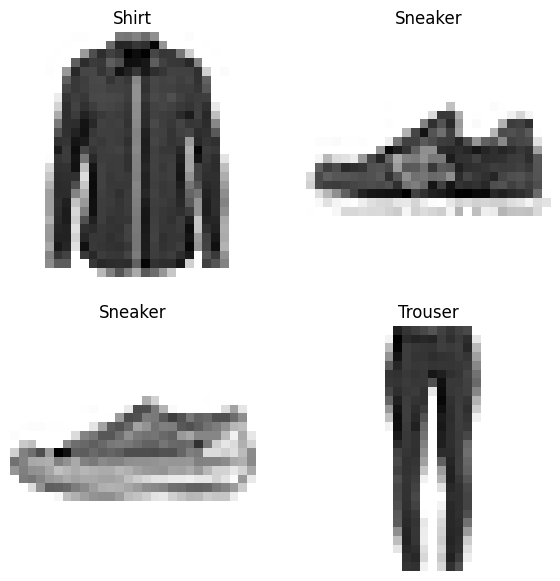

In [9]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 2s 911us/step - loss: 1.0170 - accuracy: 0.6146 - val_loss: 0.7116 - val_accuracy: 0.7433
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6392 - accuracy: 0.7702 - val_loss: 0.6382 - val_accuracy: 0.7731
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5931 - accuracy: 0.7924 - val_loss: 0.6032 - val_accuracy: 0.7922
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5709 - accuracy: 0.8027 - val_loss: 0.5886 - val_accuracy: 0.8001
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5560 - accuracy: 0.8085 - val_loss: 0.5778 - val_accuracy: 0.8017
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5457 - accuracy: 0.8130 - val_loss: 0.5776 - val_accuracy: 0.8040
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5377 - accuracy: 0.8163 - val_loss: 0.5748 - val_accurac

In [13]:
# Make predictions with the most recent model
y_probs = model_11.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.2884728e-07, 1.0370558e-11, 8.7847880e-09, 4.3283452e-09,
        1.8673139e-08, 5.1737463e-01, 6.3714524e-06, 7.2459966e-02,
        8.6740004e-03, 4.0148473e-01],
       [2.7932588e-03, 5.7077136e-06, 8.4873772e-01, 9.0048036e-07,
        5.0142832e-02, 3.3324799e-22, 9.8303750e-02, 2.2230112e-30,
        1.5780075e-05, 1.3487010e-36],
       [1.3307225e-03, 9.9859411e-01, 6.6165754e-05, 2.9743330e-06,
        4.9263615e-09, 3.1721820e-15, 5.9816812e-06, 1.2193661e-14,
        9.0954755e-09, 1.3601172e-25],
       [3.4206589e-03, 9.9628866e-01, 2.3045417e-04, 2.5829328e-05,
        6.8932515e-08, 5.5487131e-13, 3.4290169e-05, 1.0215772e-12,
        1.0763271e-07, 3.2468157e-22],
       [1.4353482e-01, 5.2510597e-05, 1.0715362e-01, 2.2518666e-02,
        1.0474524e-01, 8.4921896e-12, 6.1878628e-01, 6.0379868e-20,
        3.2087853e-03, 3.1723116e-24]], dtype=float32)

In [14]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [15]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

In [16]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[762,  18,  18,  98,   1,   2,  89,   0,  12,   0],
       [  4, 950,  14,  27,   2,   0,   2,   0,   1,   0],
       [ 26,   8, 714,  14, 155,   0,  82,   0,   1,   0],
       [ 33,  13,   9, 882,  28,   3,  27,   0,   5,   0],
       [  2,   0, 146,  41, 752,   0,  54,   0,   5,   0],
       [  0,   0,   0,   0,   0, 934,   1,  39,   7,  19],
       [183,   3, 147,  73, 192,   0, 391,   0,  11,   0],
       [  0,   0,   0,   0,   0,  73,   0, 908,   0,  19],
       [  7,   1,   2,  14,   4,   9,  60,   4, 898,   1],
       [  0,   0,   0,   0,   0,  60,   0,  53,   2, 885]], dtype=int64)

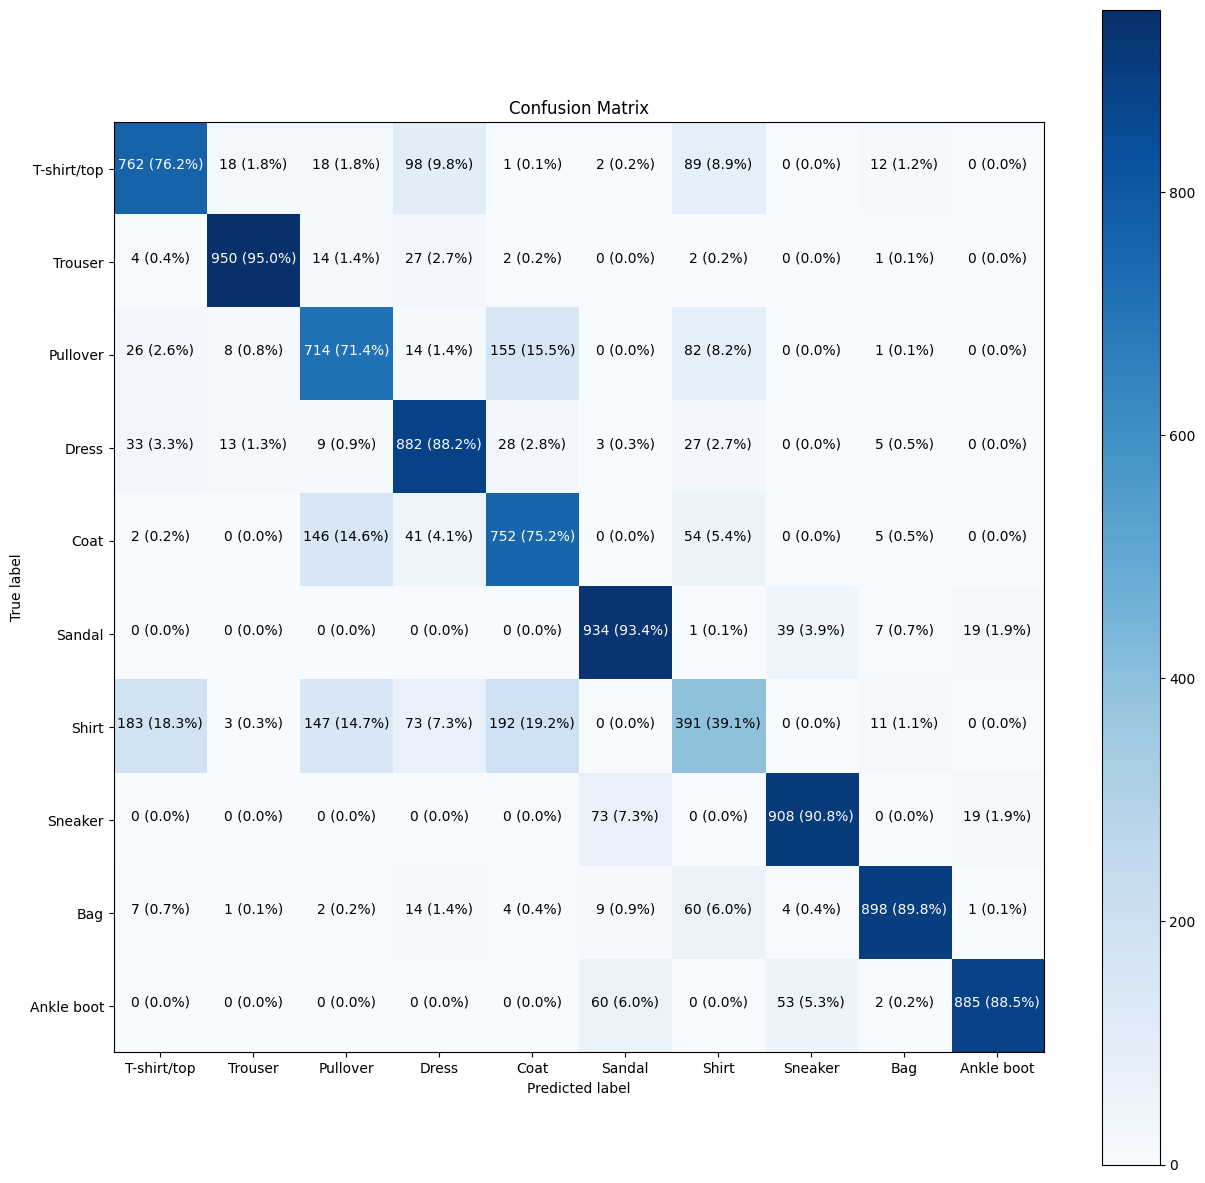

In [19]:
from utils import make_confusion_matrix

# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)